# Оценка эмоциональной окраски сообщений

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import nltk
import pandas as pd
import sklearn
from sklearn import pipeline, metrics
import wordcloud

from collections import Counter

%matplotlib inline

In [2]:
# Для работы с некотрой функциональностью nltk требуются дополнительные данные, 
# который не загружаются по-умолчанию вместе с nltk. 
# Для выполнения кода, приведенного ниже, требуется эти файлы загрузить. 
# Для загрузки запустите код ниже и следуйте инструкци в открывшемся GUI

nltk.download() 

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

## Загрузка данных

In [3]:
data = pd.read_excel('banki_data.xlsx')

In [4]:
data.head(10)

,text,label
0,отвратительное обслуживание был у меня вклад в...,0
1,мнение о банке изменилось в худшую сторону это...,0
2,банк поступил красиво у меня дебетовая карта б...,1
3,прошу принять меры по исправлению ситуации бан...,0
4,спокойно и качественно пользуюсь услугами альф...,1
5,отказ оформления кредита без страховки 22.10.2...,0
6,"отвратительный банк, оценка которому - 1 балл!...",0
7,альфа банк - беззаконие в действии всё началос...,0
8,возврат страховки 14.09.15 взяла в рассрочку т...,0
9,"пришла внезапная смс с долгом за обслуживание,...",1


In [5]:
print data.text[0]

отвратительное обслуживание был у меня вклад в альфе. решила я его перевести в другой банк. был открыт экспресс-счет. зная как работают сотрудники колл-центра альфы и насколько они квалифицированы, я позвонила 4 раза разным менеджерам, уточнить комиссию при переводе. всеми ими была озвучена цифра в 2000 руб. (максимальная при переводе с экспресс счета в другой банк).  будучи в офисе до замоскворечье 02 декабря, консультируясь по вопросу вкладов и переводов с сотрудником ириной м. (к сожалению, не записала фамилию), ею была озвучена также цифра в 2000 руб. придя в банк  07/12/15  для осуществления данного перевода, сотрудником с-ским д.е. была озвучена цифра в 23000 руб.! на 21000 больше! его коллега (маленькая худенькая девчушка, к сожалению, в силу эмоционального состояния не записала ее имя) также начала мне доказывать, что комиссия за данную операцию именно 23 тыс.руб. на аргументы о 4-х сотрудниках колл-центра и о сотруднике этого же отделения, они вдвоем хлопали ресницами и настаи

In [6]:
print data.text[2]

банк поступил красиво у меня дебетовая карта без имени. мне на неё переводят зарплату, я получаю наличные в банкомате.  около двух месяцев возникла необходимость перевести деньги другому клиенту банка. в альфа-консультанте сообщили, что со счёта карты это сделать невозможно, и предложили открыть текущий. я согласилась.  неделю назад обнаружила, что на этом счёте числится задолженность 118 руб. работник альфа-консультанта проинформировал о том, что это вместе со счётом подключился некий тариф, и с меня списали плату за два месяца. я попросила разобраться. вчера пришла смс с результатами. деньги вернули, оставили счёт, да ещё извинились за некие неудобства.  казалось бы мелочь, но очень приятно.   спасибо банку за хорошее настроение!


## Визуализация данных

### Соотношение позитивных и негативных отзывов

In [7]:
data.label.value_counts()

0    4921
1    1150
Name: label, dtype: int64

### Наиболее часто встречающиеся слова

In [8]:
positive_reviews = ' '.join(data.text[data.label == 1])
negative_reviews = ' '.join(data.text[data.label == 0])

In [9]:
positive_counter = Counter(positive_reviews.split())
negative_counter = Counter(negative_reviews.split())

In [10]:
for word in positive_counter.most_common(10):
    print word[0], word[1]

в 9637
и 8819
не 5484
на 4745
что 3961
я 3719
с 3593
- 2796
по 2427
мне 1960


In [11]:
for word in negative_counter.most_common(10):
    print word[0], word[1]

в 53074
и 43768
не 36077
на 28249
что 27191
я 26467
с 18591
мне 14603
по 14069
- 13632


###  Стоп-слова?

In [13]:
stopwords = nltk.corpus.stopwords.words("russian")

In [14]:
filtered_positive_reviews = list(filter(lambda x: x not in stopwords, positive_reviews.split()))
filtered_negative_reviews = list(filter(lambda x: x not in stopwords, negative_reviews.split()))

In [15]:
flt_positive_counter = Counter(filtered_positive_reviews)

for word in flt_positive_counter.most_common(10):
    print word[0], word[1]

- 2796
это 1401
очень 1175
банка 973
банк 927
деньги 749
карту 491
альфа 481
карты 466
время 447


In [16]:
flt_negative_counter = Counter(filtered_negative_reviews)

for word in flt_negative_counter.most_common(10):
    print word[0], word[1]

- 13632
это 7393
банка 6053
банк 4742
деньги 3895
кредит 2747
карту 2667
карты 2411
счет 2366
альфа 2295


### Облако слов

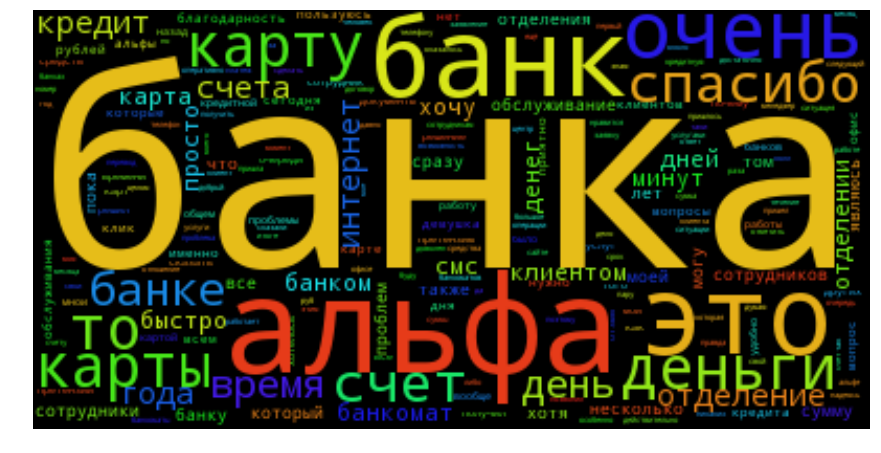

In [17]:
positive_wordcloud = wordcloud.WordCloud(random_state=0).generate(' '.join(filtered_positive_reviews))

plt.figure(figsize=(15, 8))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

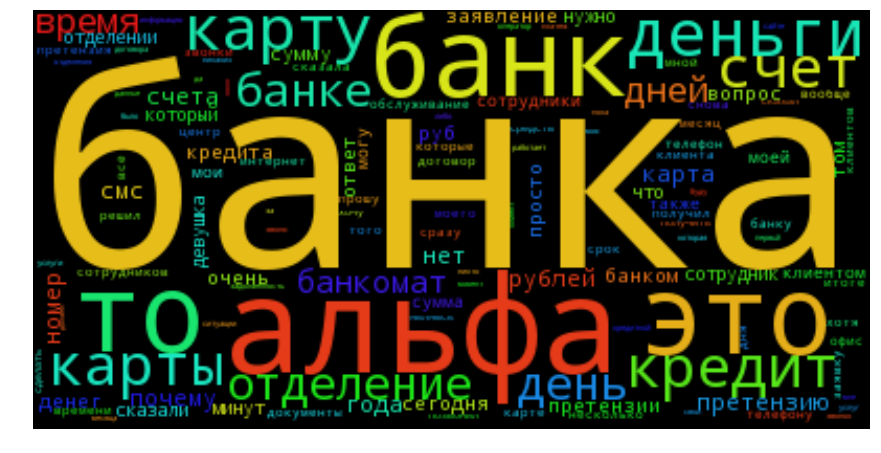

In [18]:
negative_wordcloud = wordcloud.WordCloud(random_state=0).generate(' '.join(filtered_negative_reviews))

plt.figure(figsize=(15, 8))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Построение модели

In [19]:
review_text = data.text
review_labels = data.label

In [20]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(review_text, review_labels, 
                                                                            test_size = 0.3, stratify = review_labels)

In [21]:
estimator =  pipeline.Pipeline(steps=[('tfidf', sklearn.feature_extraction.text.TfidfVectorizer()),
                                             ('logit', sklearn.linear_model.LogisticRegression())])

In [22]:
estimator.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=Tru...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [23]:
predictions = estimator.predict(X_test)

## Оценка качества

In [25]:
metrics.accuracy_score(predictions, y_test)

0.89407244785949502

In [26]:
metrics.accuracy_score(estimator.predict(X_train), y_train)

0.92421746293245466

## Как улучшить качество модели?

* Фильтрация стоп-слов
* Приведение слов к номральной форме
* Генерация дополнительных признаков: статистики на основе пар слов, n-gramm, длина отзыва и пр.
* Рассмотрение других моделей
* Настройка параметров моделей